In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Santa Clara versus Fresno

In [3]:
def graph_labor(df):
    df["Year-Month"] = pd.to_datetime(df["Year-Month"])
    # sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Year-Month", y="Employment", data=df, marker="o")
    plt.title("Employment Over Time")
    plt.xlabel("Year")
    plt.ylabel("Employment")
    plt.xticks(rotation=45)
    plt.show()

def graph_real_estate(df):
    df["Date"] = pd.to_datetime(df["Date"])
    sns.set_theme()
    plt.figure(figsize=(14, 7))
    sns.lineplot(x="Date", y="Price", data=df, marker="o")
    plt.title("Price Trend Over Time")
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()

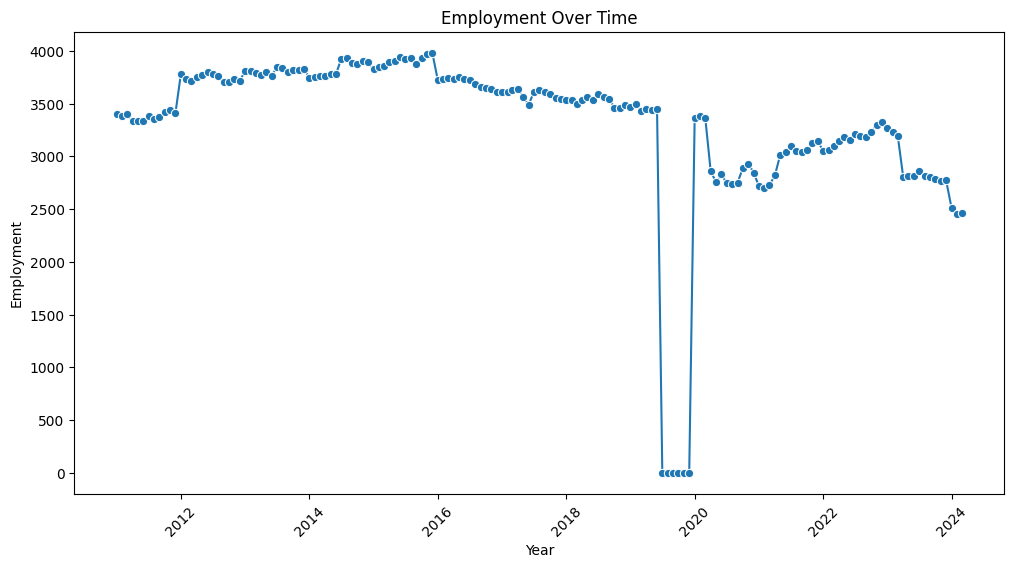

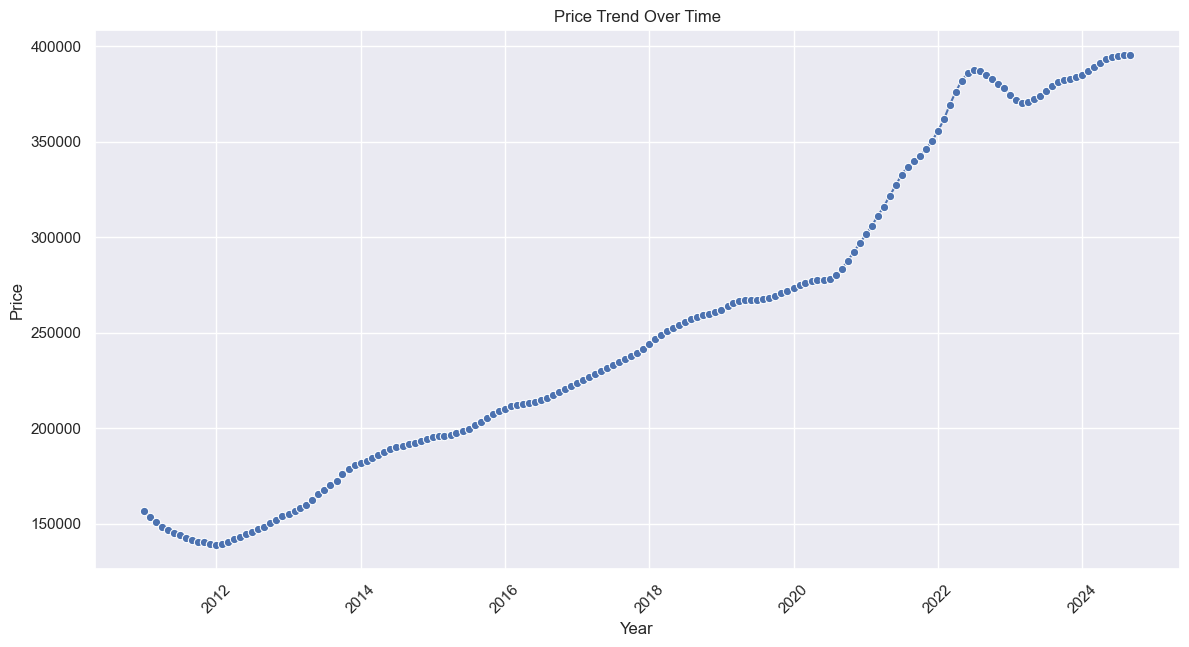

                          Year-Month   Employment
count                            159   159.000000
mean   2017-07-31 23:14:43.018867968  3309.949686
min              2011-01-01 00:00:00     0.000000
25%              2014-04-16 00:00:00  3113.500000
50%              2017-08-01 00:00:00  3501.000000
75%              2020-11-16 00:00:00  3756.500000
max              2024-03-01 00:00:00  3982.000000
std                              NaN   758.987874
                                Date          Price
count                            165     165.000000
mean   2017-10-31 06:50:10.909090816  252683.593939
min              2011-01-01 00:00:00  138997.000000
25%              2014-06-01 00:00:00  189172.000000
50%              2017-11-01 00:00:00  239554.000000
75%              2021-04-01 00:00:00  316048.000000
max              2024-09-01 00:00:00  395622.000000
std                              NaN   81946.606065


In [ ]:
# Fresno employment and real estate graphs
fresno_employment = pd.read_csv("./data/processed_employment/Fresno_County,_California.csv")
fresno_real_estate = pd.read_csv("./data/processed_zillow/Fresno_County.csv")


graph_labor(fresno_employment)
graph_real_estate(fresno_real_estate)

print(fresno_employment.describe())
print(fresno_real_estate.describe())

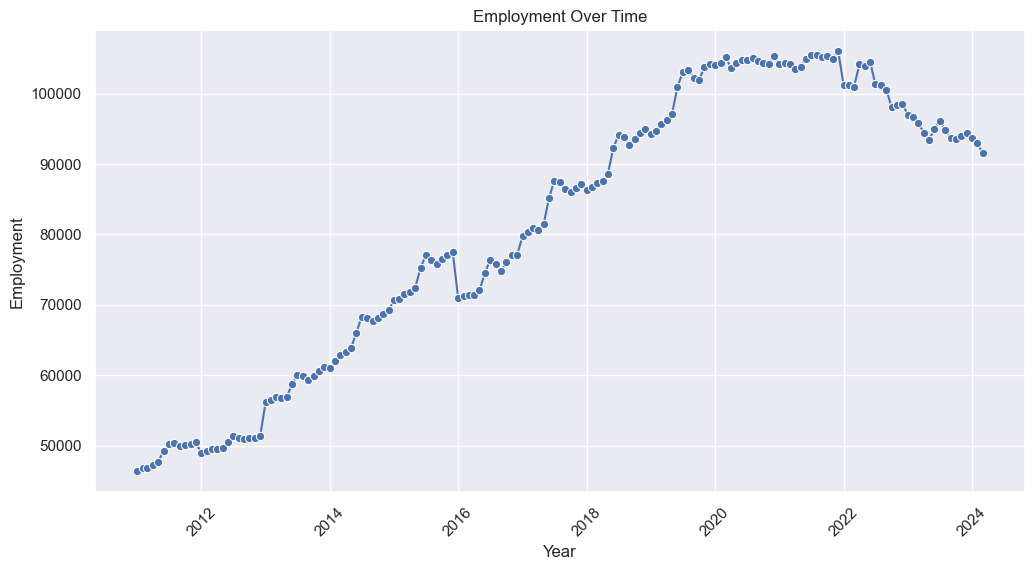

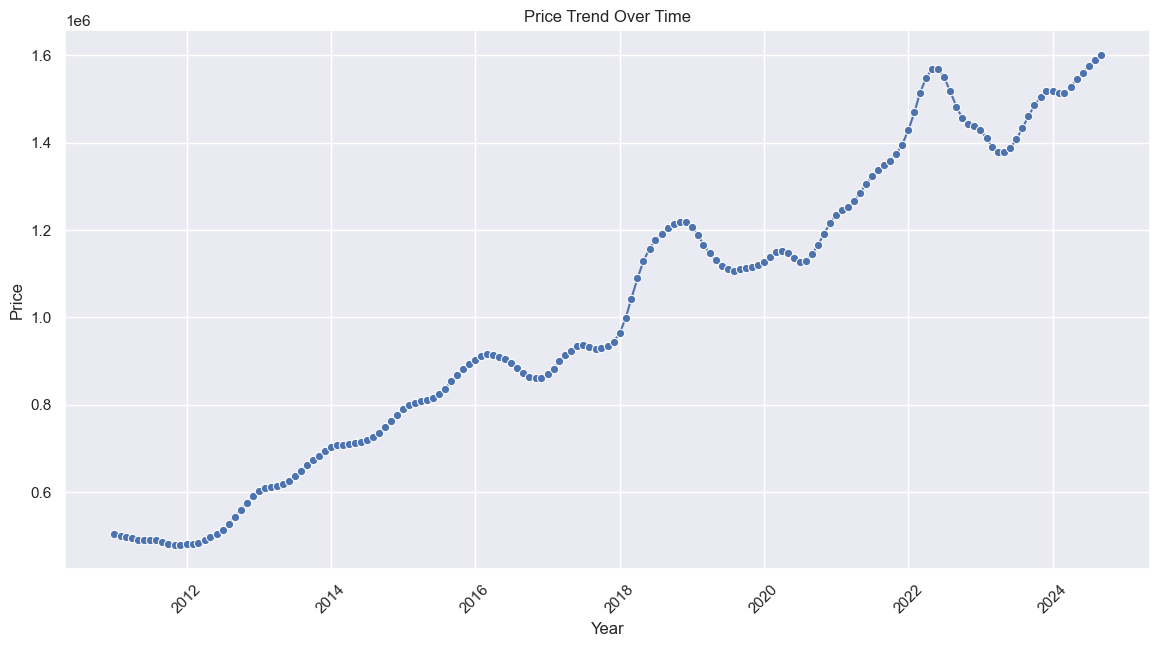

In [5]:
# Santa Clara employment and real estate graphs
sc_employment = pd.read_csv(
    "./data/processed_employment/Santa_Clara_County,_California.csv"
)
sc_real_estate = pd.read_csv("./data/processed_zillow/Santa_Clara_County.csv")

graph_labor(sc_employment)
graph_real_estate(sc_real_estate)

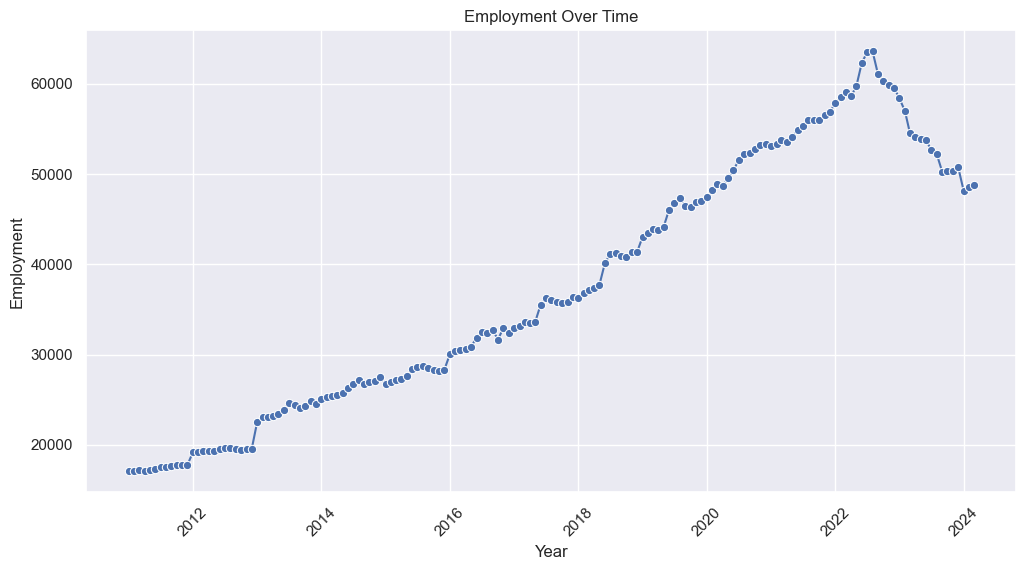

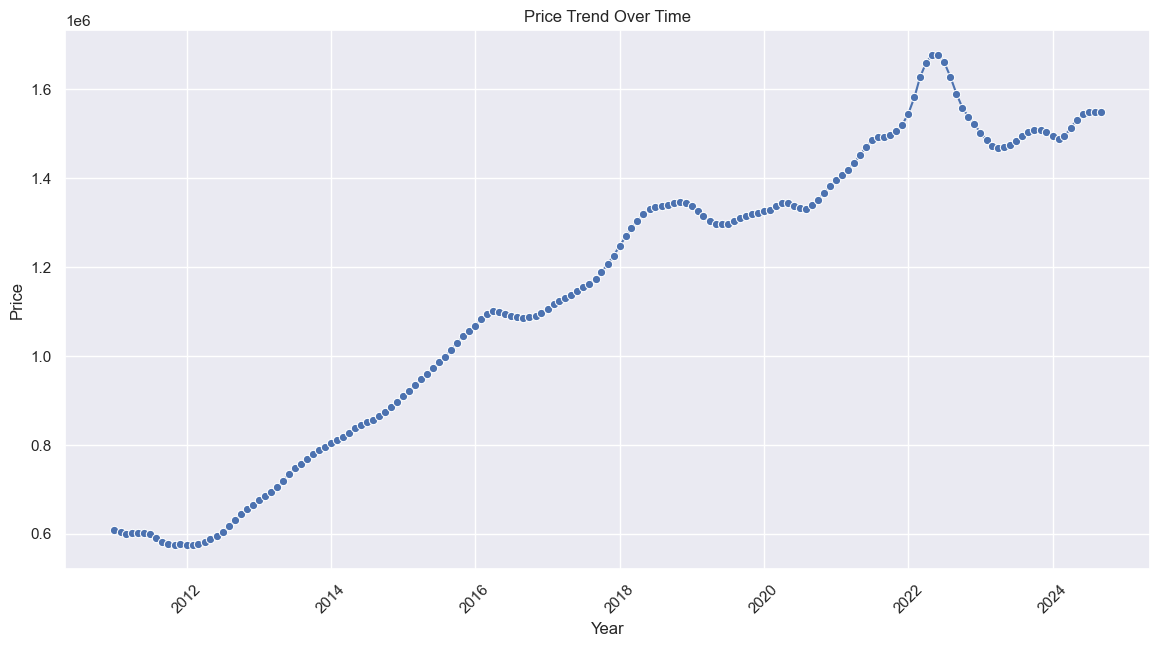

In [6]:
# Sant Mateo employment and real estate graphs
sm_employment = pd.read_csv(
    "./data/processed_employment/San_Mateo_County,_California.csv"
)
sm_real_estate = pd.read_csv("./data/processed_zillow/San_Mateo_County.csv")

graph_labor(sm_employment)
graph_real_estate(sm_real_estate)

In [44]:
import statsmodels.formula.api as smf

sc_real_estate["county"] = "Santa Clara"
fresno_real_estate["county"] = "Fresno"

# Concatenate dataframes
data = pd.concat([sc_real_estate, fresno_real_estate])


data["treatment"] = data["county"].apply(lambda x: 1 if x == "Santa Clara" else 0)
# Define post variable based on intervention year, e.g., 2020
intervention_year = 2012
intervention_date = pd.to_datetime(f"{intervention_year}-01-01")
data["post"] = data["Date"].apply(lambda x: 1 if x >= intervention_date else 0)

# Interaction term for DiD
data["treatment_post"] = data["treatment"] * data["post"]
print(data.head(50))
model = smf.ols(
    "Price ~ treatment + post + treatment_post", data=data
).fit()
print(model.summary())

         Date   Price       county       County  treatment  post  \
0  2011-01-01  504038  Santa Clara  Santa Clara          1     0   
1  2011-02-01  500356  Santa Clara  Santa Clara          1     0   
2  2011-03-01  498355  Santa Clara  Santa Clara          1     0   
3  2011-04-01  495651  Santa Clara  Santa Clara          1     0   
4  2011-05-01  491514  Santa Clara  Santa Clara          1     0   
5  2011-06-01  491040  Santa Clara  Santa Clara          1     0   
6  2011-07-01  490094  Santa Clara  Santa Clara          1     0   
7  2011-08-01  491445  Santa Clara  Santa Clara          1     0   
8  2011-09-01  486773  Santa Clara  Santa Clara          1     0   
9  2011-10-01  481143  Santa Clara  Santa Clara          1     0   
10 2011-11-01  480105  Santa Clara  Santa Clara          1     0   
11 2011-12-01  479770  Santa Clara  Santa Clara          1     0   
12 2012-01-01  480794  Santa Clara  Santa Clara          1     1   
13 2012-02-01  480972  Santa Clara  Santa Clara 

In [9]:
import statsmodels.formula.api as smf

sc_real_estate["county"] = "Santa Clara"
sm_real_estate["county"] = "San Mateo"

# Concatenate dataframes
data = pd.concat([sc_real_estate, sm_real_estate])

print(data)

data["treatment"] = data["county"].apply(lambda x: 1 if x == "Santa Clara" else 0)
# Define post variable based on intervention year, e.g., 2020
intervention_year = 2018
intervention_date = pd.to_datetime(f"{intervention_year}-01-01")
data["post"] = data["Date"].apply(lambda x: 1 if x >= intervention_date else 0)

# Interaction term for DiD
data["treatment_post"] = data["treatment"] * data["post"]

model = smf.ols("Price ~ treatment + post + treatment_post", data=data).fit()
print(model.summary())

          Date    Price       county
0   2011-01-01   504038  Santa Clara
1   2011-02-01   500356  Santa Clara
2   2011-03-01   498355  Santa Clara
3   2011-04-01   495651  Santa Clara
4   2011-05-01   491514  Santa Clara
..         ...      ...          ...
160 2024-05-01  1531926    San Mateo
161 2024-06-01  1543690    San Mateo
162 2024-07-01  1548980    San Mateo
163 2024-08-01  1549801    San Mateo
164 2024-09-01  1549883    San Mateo

[330 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     343.3
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          1.59e-100
Time:                        10:45:13   Log-Likelihood:                -4438.7
No. Observations:                 330   AIC:              

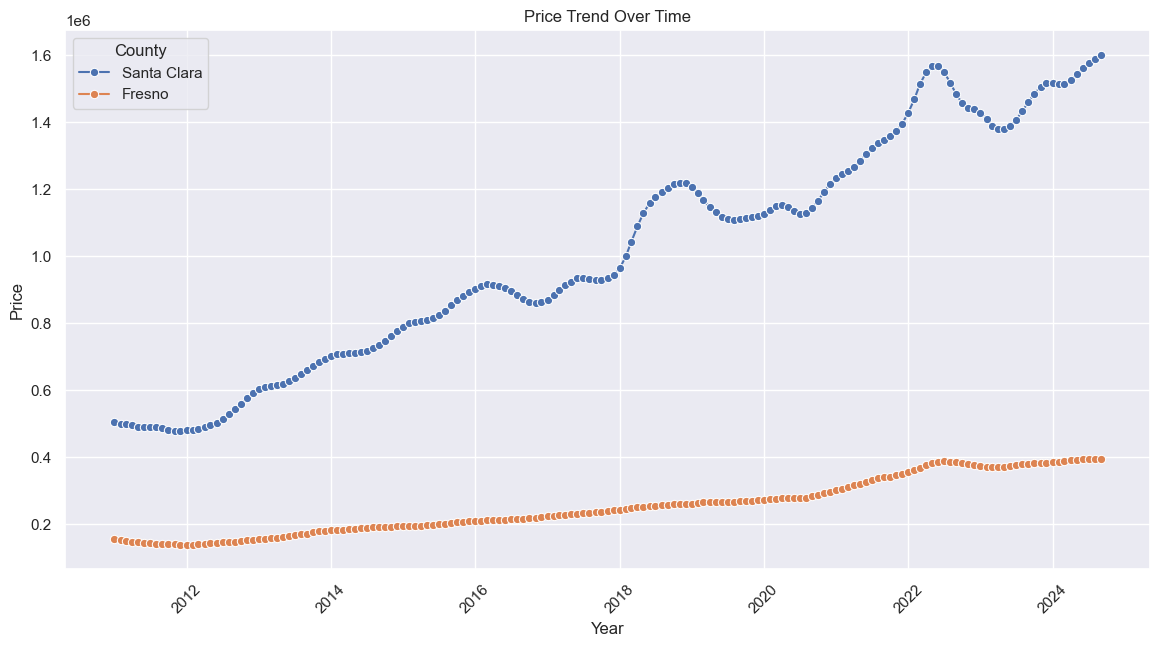

In [38]:
# Plot Santa Clara and Fresno together
def graph_real_estates(df, hue_column):
    df["Date"] = pd.to_datetime(df["Date"])
    sns.set_theme()
    plt.figure(figsize=(14, 7))

    # Use hue to differentiate between multiple lines
    sns.lineplot(x="Date", y="Price", hue=hue_column, data=df, marker="o")

    plt.title("Price Trend Over Time")
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend(title=hue_column)
    plt.show()

sc_real_estate["County"] = "Santa Clara"
fresno_real_estate["County"] = "Fresno"

sc_and_fresno = pd.concat([sc_real_estate, fresno_real_estate], axis = 0)
sc_and_fresno

graph_real_estates(sc_and_fresno, "County")

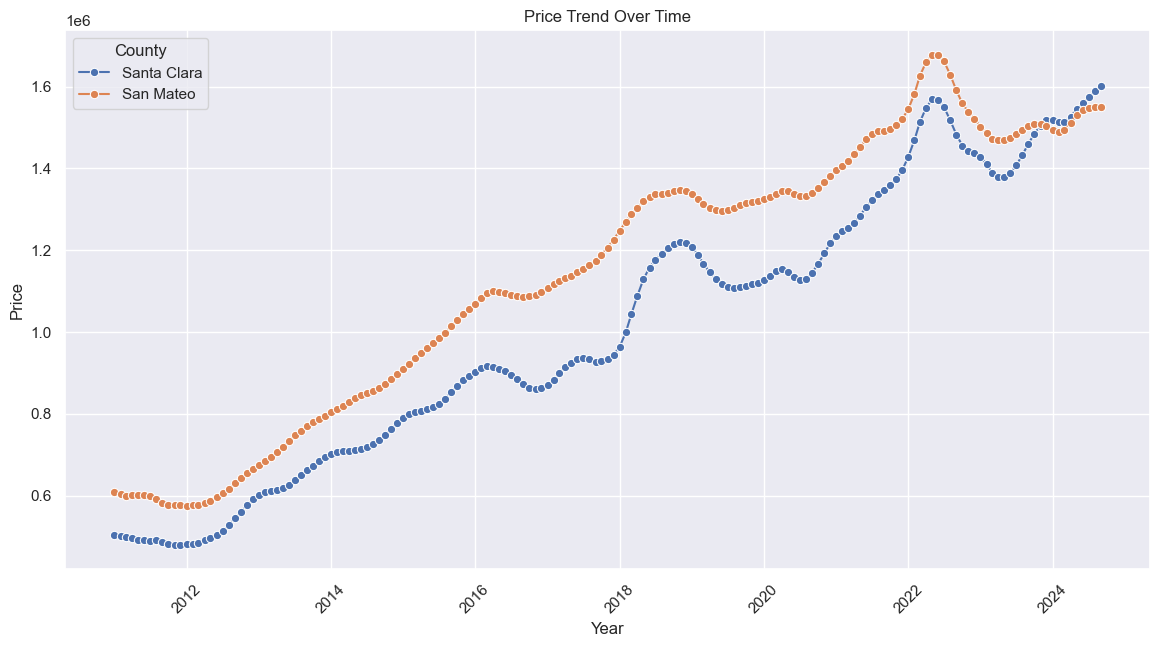

In [45]:
sm_real_estate["County"] = "San Mateo"
sc_and_sm = pd.concat([sc_real_estate, sm_real_estate], axis=0)
graph_real_estates(sc_and_sm, "County")